#### Summary
The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus.

Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added. These both tables must be used for analysis.


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the two datasets
df=pd.read_csv("COVID19_Worldmeter_Snapshot.csv")
dfage=pd.read_csv("Population_age_countrywise.csv")

In [3]:
df.head()

Date Country  Population  Total Tests  Total Cases  Total Deaths  \
0  2020-04-18     USA   330774664    3722145.0     738792.0       39014.0   
1  2020-04-18  Russia   145927292    1831892.0      36793.0         313.0   
2  2020-04-18   Spain    46752703     930230.0     194416.0       20043.0   
3  2020-04-18  Brazil   212380932      62985.0      36722.0        2361.0   
4  2020-04-18      UK    67844241     460437.0     114217.0       15464.0   

   Total Recovered  Serious or Critical  Active Cases  
0          68269.0              13551.0      631509.0  
1           3057.0                  8.0       33423.0  
2          74797.0               7371.0       99576.0  
3          14026.0               6634.0       20335.0  
4              NaN               1559.0       98409.0

In [4]:
dfage.head()

Country  Fraction age 0-14 years  Fraction age 15-64 years  \
0     USA                    0.189                     0.657   
1  Russia                    0.176                     0.682   
2   Spain                    0.147                     0.659   
3  Brazil                    0.217                     0.697   
4      UK                    0.177                     0.638   

   Fraction age 65+ years  
0                   0.154  
1                   0.142  
2                   0.194  
3                   0.086  
4                   0.185

In [5]:
print(df.shape)
print(dfage.shape)
# There are 6603 rows and 9 columns in the COVID19 dataset and 213 rows and 4 columns in the age dataset

(6603, 9)
(213, 4)


In [6]:
#checking the datatypes
print(df.dtypes)
print("\n")
print(dfage.dtypes)

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object


Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object


In [7]:
# changing the datatype of the date column
pd.to_datetime(df['Date'])

0      2020-04-18
1      2020-04-18
2      2020-04-18
3      2020-04-18
4      2020-04-18
          ...    
6598   2020-05-18
6599   2020-05-18
6600   2020-05-18
6601   2020-05-18
6602   2020-05-18
Name: Date, Length: 6603, dtype: datetime64[ns]

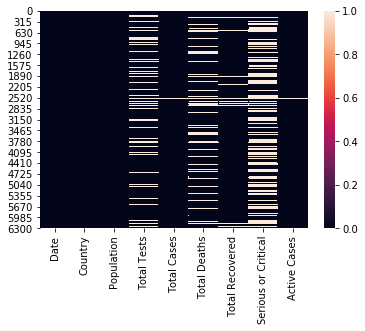

In [8]:
#checking null values
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [10]:
dfage.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

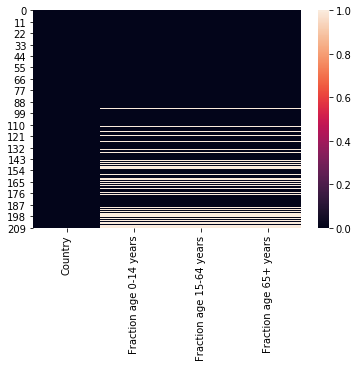

In [11]:
sns.heatmap(dfage.isnull())

#### Missing values in the dataset dfage

In [12]:
# checking the rows where there are null values
#dfage dataframe
dfage[dfage.isnull().any(axis=1)]

Country  Fraction age 0-14 years  \
95                  Mayotte                      NaN   
112                 Andorra                      NaN   
117              San Marino                      NaN   
121         Channel Islands                      NaN   
127                 Réunion                      NaN   
134             Isle of Man                      NaN   
137              Cabo Verde                      NaN   
145   Sao Tome and Principe                      NaN   
147           French Guiana                      NaN   
149              Martinique                      NaN   
151          Faeroe Islands                      NaN   
152              Guadeloupe                      NaN   
153               Gibraltar                      NaN   
158                 Bermuda                      NaN   
162                   Aruba                      NaN   
163                  Monaco                      NaN   
165          Cayman Islands                      NaN   
167           Liechtenstein                      NaN   
169            Sint Maarten                      NaN   
172        French Polynesia                      NaN   
176                   Macao                      NaN   
178            Saint Martin                      NaN   
190           New Caledonia                      NaN   
192  St. Vincent Grenadines                      NaN   
194                Dominica                      NaN   
196   Saint Kitts and Nevis                      NaN   
197        Falkland Islands                      NaN   
198        Turks and Caicos                      NaN   
199            Vatican City                      NaN   
201              Montserrat                      NaN   
203               Greenland                      NaN   
205  British Virgin Islands                      NaN   
207   Caribbean Netherlands                      NaN   
208               St. Barth                      NaN   
209          Western Sahara                      NaN   
210                Anguilla                      NaN   
212   Saint Pierre Miquelon                      NaN   

     Fraction age 15-64 years  Fraction age 65+ years  
95                        NaN                     NaN  
112                       NaN                     NaN  
117                       NaN                     NaN  
121                       NaN                     NaN  
127                       NaN                     NaN  
134                       NaN                     NaN  
137                       NaN                     NaN  
145                       NaN                     NaN  
147                       NaN                     NaN  
149                       NaN                     NaN  
151                       NaN                     NaN  
152                       NaN                     NaN  
153                       NaN                     NaN  
158                       NaN                     NaN  
162                       NaN                     NaN  
163                       NaN                     NaN  
165                       NaN                     NaN  
167                       NaN                     NaN  
169                       NaN                     NaN  
172                       NaN                     NaN  
176                       NaN                     NaN  
178                       NaN                     NaN  
190                       NaN                     NaN  
192                       NaN                     NaN  
194                       NaN                     NaN  
196                       NaN                     NaN  
197                       NaN                     NaN  
198                       NaN                     NaN  
199                       NaN                     NaN  
201                       NaN                     NaN  
203                       NaN                     NaN  
205                       NaN                     NaN  
207                       NaN              

The missing values have been fetched from the wikipedia and other website:-
1) Mayotte
0-14 years: 46.5% (male 41,632; female 41,301)
15-64 years: 51.8% (male 50,373; female 42,118)
65 years and over: 1.7% (male 1,502; female 1,511)

0-14 years: 0.465 
15-64 years: 0.518 
65 years and over: 0.17 

2) Andorra
0-14 years: 15.3% (male 6,708/female 6,379)
15-24 years: 9.2% (male 4,078/female 3,766)
25-54 years: 48.7% (male 21,395/female 20,231)
55-64 years: 12.5% (male 5,756/female 4,957)
65 years and over: 14.3% (male 6,145/female 6,043) (2014 est.)

0-14 years: 0.153
15-64 years: 0.704
65 years and over:0.14 
    
3) San Marino
0-14 years: 16% (male 2,181; female 2,038)
15-64 years: 68% (male 8,992; female 9,425)
65 years and over: 16% (male 1,849; female 2,452) (2000 est.)

0-14 years: 0.16
15-64 years: 0.68
65 years and over:0.16 
    
4) Channel Islands

Not available

5) Réunion
0-14	32	1.05
15-64	62	0.97
65+	6	0.68

0-14 years: 0.32
15-64 years: 0.62
65 years and over:0.06 

6) Isle of Man
0-14 years: 16.27% (male 7,587 /female 6,960)
15-24 years: 11.3% (male 5,354 /female 4,750)
25-54 years: 38.48% (male 17,191 /female 17,217)
55-64 years: 13.34% (male 6,012 /female 5,919)
65 years and over: 20.6% (male 8,661 /female 9,756) (2018 est.)

0-14 years: 0.162
15-64 years: 0.631
65 years and over:0.206 
    
7) Cabo Verde
0-14 years: 28.7% (male 82,035 /female 81,082)
15-24 years: 19.64% (male 55,811 /female 55,798)
25-54 years: 40.02% (male 110,646 /female 116,804)
55-64 years: 6.4% (male 16,154 /female 20,245)
65 years and over: 5.24% (male 11,272 /female 18,526) (2018 est.)

0-14 years: 0.287
15-64 years: 0.66
65 years and over:0.524 

8) Sao Tome and Principe
0-14 years: 41.2% (male 42,825 /female 41,403)
15-24 years: 21.01% (male 21,767 /female 21,188)
25-54 years: 31.03% (male 31,218 /female 32,229)
55-64 years: 3.93% (male 3,708 /female 4,332)
65 years and over: 2.83% (male 2,545 /female 3,239) (2018 est.)

0-14 years: 0.412
15-64 years: 0.56
65 years and over:0.283 

9) French Guiana
18.5	64.7	16.8

0-14 years: 0.185
15-64 years: 0.647
65 years and over:0.168 

10) Martinique

Age group	Male	Female	Total	Percent
0-14	39 361	38 371	77 732	19,61
15-64	117 461	140 709	258 170	65,14
65+	25 822	34 584	60 406	15,24

0-14 years: 0.196
15-64 years: 0.651
65 years and over:0.152

11) Faeroe Islands
0-14 years: 19.89% (male 5,214/female 4,878)
15-24 years: 14.34% (male 3,738/female 3,538)
25-54 years: 37.31% (male 10,252/female 8,676)
55-64 years: 11.69% (male 3,054/female 2,878)
65 years and over: 16.76% (male 4,111/female 4,391) (2017 est.)
   
0-14 years: 0.199
15-64 years: 0.633
65 years and over:0.168
    
12) Guadeloupe
Age group	Male	Female	Total	Percent
0-14	45 290	42 482	87 772	21,85
15-64	118 260	140 587	258 847	64,42
65+	23 396	31 769	55 165	13,73

0-14 years: 0.219
15-64 years: 0.644
65 years and over:0.137

13) Gibraltar
0-14 years: 17.2% (male 2,460; female 2,343)
15-64 years: 66.3% (male 9,470; female 9,070)
65 years and over: 16.5% (male 2,090; female 2,534) (2007 est.)[21]

0-14 years: 0.172
15-64 years: 0.663
65 years and over:0.165
    
14) Bermuda

Age group	Male	Female	Total	Percent
0-14	5,316	5,188	10,504	16,35
15-64	21,877	23,173	45,050	70,13
65+	3,665	5,018	8,683	13,52

0-14 years: 0.164
15-64 years: 0.701
65 years and over:0.135

15) Aruba
Age group	Male	Female	Total	Percent
0-14	10 413	10 114	20 527	19,37
15-64	34 635	38 743	73 378	69,24
65+	5 069	7 002	12 071	11,39

0-14 years: 0.194
15-64 years: 0.692
65 years and over:0.114

16) Monaco
Age structure:
0-14 years: 12.3% (male 1,930/ female 1,841)
15-64 years: 60.8% (male 9,317/ female 9,249)
65 years and over: 26.9% (male 3,640/ female 4,562) (2012 estimate)

0-14 years: 0.123
15-64 years: 0.608
65 years and over:0.269
    
17) Cayman Islands

Age group	Male	Female	Total	%
Total	27 106	28 585	55 691	100
0-14	4 512	4 831	9 343	16,78
15-24	2 873	2 916	5 789	10,39
25-34	4 727	5 043	9 771	17,55
35-44	5 746	5 955	11 701	21,01
45-54	4 836	5 070	9 907	17,79
55-64	2 530	2 744	5 274	9,47
65+	1 881	2 025	3 907	7,02

0-14 years: 0.17
15-64 years: 0.66
65 years and over:0.07

18) Liechtenstein
Age structure:
0–14 years: 16.1% (male 2,809/female 2,856)
15–64 years: 69% (male 11,970/female 12,326)
65 years and over: 15% (male 2,304/female 2,971) (2011 est.)

0-14 years: 0.16
15-64 years: 0.69
65 years and over:0.15
    
19) Sint Maarten
21	73.3	5.7

- percentage of population under 15
- percentage of population between 15 and 64 years old
- percentage of population 65+

0-14 years: 0.21
15-64 years: 0.733
65 years and over:0.057

20) French Polynesia
Age structure
0–14 years: 21.69% (male 32,920/female 31,100)
15–24 years: 14.72% (male 22,640/female 20,793)
25–54 years: 44.24% (male 66,921/female 63,636)
55–64 years: 10.31% (male 15,610/female 14,823)
65 years and over: 9.04% (male 12,854/female 13,824) (2020 est.)

0-14 years: 0.217
15-64 years: 0.692
65 years and over:0.09
    
21) Macao
Age structure
below age 15: 76,305 15.63%
age 20-29: 82,547 16.91%
age 30-39: 70,965 14.54%
age 40-49: 91,438 18.73%
age 49 or above: 40,349 8.27%

0-14 years: 0.155
15-64 years: 0.585
65 years and over:0.26
    
22) Saint Martin
0-14 years: 26.05% (male 4,184 /female 4,225)
15-24 years: 10.29% (male 1,638 /female 1,685)
25-54 years: 46.52% (male 7,181 /female 7,836)
55-64 years: 8.76% (male 1,317 /female 1,511)
65 years and over: 8.38% (male 1,195 /female 1,512) (2018 est.)

0-14 years: 0.26
15-64 years: 0.655
65 years and over:0.85
    
23) New Caledonia
0–14 years: 21.74% (male 32,227/female 30,819)
15–24 years: 15.63% (male 23,164/female 22,163)
25–54 years: 43.73% (male 63,968/female 62,856)
55–64 years: 9.06% (male 12,700/female 13,568)
65 years and over: 9.84% (male 12,552/female 15,992)

0-14 years: 0.217
15-64 years: 0.685
65 years and over:0.098
    
24) St. Vincent Grenadines
Age group	Male	Female	Total	Percent
0-14	15 403	14 974	30 377	30,66
15-64	31 441	30 049	61 490	62,06
65+	3 165	4 054	7 219	7,29

0-14 years: 0.306
15-64 years: 0.62
65 years and over:0.07

25) Dominica
Age group	Male	Female	Total	Percent
0-14	10 759	10 217	20 976	29,47
15-64	22 279	20 699	42 978	60,38
65+	3 200	4 026	7 226	10,15

0-14 years: 0.295
15-64 years: 0.60
65 years and over:0.10

26) Saint Kitts and Nevis
	
0-14 years: 20.09% (male 5,354 /female 5,311)
15-24 years: 14.28% (male 3,645 /female 3,936)
25-54 years: 44.25% (male 12,059 /female 11,437)
55-64 years: 12.35% (male 3,274 /female 3,283)
65 years and over: 9.03% (male 2,236 /female 2,559) (2018 est.)

0-14 years: 0.20
15-64 years: 0.71
65 years and over:0.09
    
27) Falkland Islands
Not available

28) Turks and Caicos
0-14 years: 21.62% (male 5,916 /female 5,694)
15-24 years: 13.7% (male 3,657 /female 3,698)
25-54 years: 52.97% (male 14,316 /female 14,128)
55-64 years: 6.96% (male 1,988 /female 1,748)
65 years and over: 4.76% (male 1,181 /female 1,375) (2018 est.)

0-14 years: 0.22
15-64 years: 0.74
65 years and over:0.04
    
29) Vatican City
Not available

30) Montserrat
Age group	Male	Female	Total	Percent
0-14	490	481	971	19,73
15-64	1 709	1 551	3 260	66,23
65+	347	344	691	14,04

0-14 years: 0.20
15-64 years: 0.66
65 years and over:0.14

31) Greenland
0-14 years: 21% (male 6,151 /female 5,962)
15-24 years: 15.1% (male 4,388 /female 4,321)
25-54 years: 40.83% (male 12,349 /female 11,209)
55-64 years: 13.5% (male 4,259 /female 3,529)
65 years and over: 9.57% (male 2,944 /female 2,579) (2018 est.)

0-14 years: 0.21
15-64 years: 0.69
65 years and over:0.01
    
32) British Virgin Islands
0-14 years: 16.72% (male 2,949 /female 3,036)
15-24 years: 12.98% (male 2,223 /female 2,425)
25-54 years: 49.05% (male 8,230 /female 9,330)
55-64 years: 11.93% (male 2,073 /female 2,199)
65 years and over: 9.32% (male 1,611 /female 1,726) (2018 est.)

0-14 years: 0.17
15-64 years: 0.74
65 years and over:0.09

33) Caribbean Netherlands
Age structure:

0–14 years: 23,9% (male 27 197; female 25 886)
15–64 years: 67.3% (male 71 622; female 77 710)
65 years and over: 8.7% (male 7 925; female 11 396) (2006 est.)

0-14 years: 0.24
15-64 years: 0.67
65 years and over:0.09

34) St. Barth
0-14 years: 15.96% (male 587 /female 556)
15-24 years: 7.26% (male 272 /female 248)
25-54 years: 43.13% (male 1,682 /female 1,406)
55-64 years: 16.13% (male 621 /female 534)
65 years and over: 17.51% (male 631 /female 623) (2018 est.)

0-14 years: 0.24
15-64 years: 0.67
65 years and over:0.09

35) Western Sahara
0-14 years: 36.93% (male 115,703 /female 113,121)
15-24 years: 19.49% (male 60,793 /female 59,948)
25-54 years: 34.52% (male 105,420 /female 108,462)
55-64 years: 5.11% (male 14,773 /female 16,880)
65 years and over: 3.95% (male 10,787 /female 13,664) (2018 est.)

0-14 years: 0.37
15-64 years: 0.59
65 years and over:0.04

36) Anguilla
0-14 years: 22.01% (male 1,954 /female 1,880)
15-24 years: 14.06% (male 1,231 /female 1,219)
25-54 years: 43.27% (male 3,386 /female 4,152)
55-64 years: 11.54% (male 918 /female 1,092)
65 years and over: 9.13% (male 786 /female 804) (2018 est.)

0-14 years: 0.22
15-64 years: 0.69
65 years and over:0.09

37) Saint Pierre Miquelon
0-14 years: 14.88% (male 420 /female 394)
15-24 years: 8.99% (male 255 /female 237)
25-54 years: 41.44% (male 1,109 /female 1,158)
55-64 years: 13.69% (male 389 /female 360)
65 years and over: 21% (male 489 /female 660) (2018 est.)

0-14 years: 0.15
15-64 years: 0.64
65 years and over:0.21

##### For all those where information is not available, we can fill the data below 14 years and above 65 years as 0.15 each and 15-64 as 0.70.

In [13]:
#Filling missing datas

#95 Mayotte

dfage.iloc[95,1]=0.465
dfage.iloc[95,2]=0.518
dfage.iloc[95,3]=0.017

# 112 Andorra

dfage.iloc[112,1]=0.153
dfage.iloc[112,2]=0.704
dfage.iloc[112,3]=0.14

# 117 San Marino
dfage.iloc[117,1]=0.153
dfage.iloc[117,2]=0.704
dfage.iloc[117,3]=0.14

# 121 Channel Islands
dfage.iloc[121,1]=0.15
dfage.iloc[121,2]=0.70
dfage.iloc[121,3]=0.15

# 127 Réunion
dfage.iloc[127,1]=0.32
dfage.iloc[127,2]=0.62
dfage.iloc[127,3]=0.06 

# 134 Isle of Man
dfage.iloc[134,1]=0.162
dfage.iloc[134,2]=0.631
dfage.iloc[134,3]=0.206

# 137 Cabo Verde
dfage.iloc[137,1]=0.287
dfage.iloc[137,2]=0.66
dfage.iloc[137,3]=0.524

# 145 Sao Tome and Principe
dfage.iloc[145,1]=0.412
dfage.iloc[145,2]=0.56
dfage.iloc[145,3]=0.283

# 147 French Guiana
dfage.iloc[147,1]=0.185
dfage.iloc[147,2]=0.647
dfage.iloc[147,3]=0.168

# 149 Martinique
dfage.iloc[149,1]=0.196
dfage.iloc[149,2]=0.651
dfage.iloc[149,3]=0.152

# 151 Faeroe Islands
dfage.iloc[151,1]=0.199
dfage.iloc[151,2]=0.633
dfage.iloc[151,3]=0.168

# 152 Guadeloupe
dfage.iloc[152,1]=0.219
dfage.iloc[152,2]=0.644
dfage.iloc[152,3]=0.137

# 153 Gibraltar
dfage.iloc[153,1]=0.172
dfage.iloc[153,2]=0.663
dfage.iloc[153,3]=0.165

# 158 Bermuda
dfage.iloc[158,1]=0.164
dfage.iloc[158,2]=0.701
dfage.iloc[158,3]=0.135

# 162 Aruba
dfage.iloc[162,1]=0.194
dfage.iloc[162,2]=0.692
dfage.iloc[162,3]=0.114

# 163 Monaco
dfage.iloc[163,1]=0.123
dfage.iloc[163,2]=0.608
dfage.iloc[163,3]=0.269

# 165 Cayman Islands
dfage.iloc[165,1]=0.17
dfage.iloc[165,2]=0.66
dfage.iloc[165,3]=0.07

# 167 Liechtenstein
dfage.iloc[167,1]=0.16
dfage.iloc[167,2]=0.69
dfage.iloc[167,3]=0.15

# 169 Sint Maarten
dfage.iloc[169,1]=0.21
dfage.iloc[169,2]=0.733
dfage.iloc[169,3]=0.057

# 172 French Polynesia
dfage.iloc[172,1]=0.217
dfage.iloc[172,2]=0.692
dfage.iloc[172,3]=0.09

#176 Macao
dfage.iloc[176,1]=0.155
dfage.iloc[176,2]=0.585
dfage.iloc[176,3]=0.26

#178 Saint Martin
dfage.iloc[178,1]=0.26
dfage.iloc[178,2]=0.655
dfage.iloc[178,3]=0.85
    
# 190 New Caledonia
dfage.iloc[190,1]=0.217
dfage.iloc[190,2]=0.685
dfage.iloc[190,3]=0.098

# 192 St. Vincent Grenadines
dfage.iloc[192,1]=0.306
dfage.iloc[192,2]=0.62
dfage.iloc[192,3]=0.07

# 194 Dominica
dfage.iloc[194,1]=0.295
dfage.iloc[194,2]=0.60
dfage.iloc[194,3]=0.10

#196 Saint Kitts and Nevis
dfage.iloc[196,1]=0.20
dfage.iloc[196,2]=0.71
dfage.iloc[196,3]=0.09

#197 Falkland Islands
dfage.iloc[197,1]=0.15
dfage.iloc[197,2]=0.70
dfage.iloc[197,3]=0.15

#198 Turks and Caicos
dfage.iloc[198,1]=0.22
dfage.iloc[198,2]=0.74
dfage.iloc[198,3]=0.04

#199 Vatican City
dfage.iloc[199,1]=0.15
dfage.iloc[199,2]=0.70
dfage.iloc[199,3]=0.15

#201 Montserrat
dfage.iloc[201,1]=0.20
dfage.iloc[201,2]=0.66
dfage.iloc[201,3]=0.14

#203 Greenland
dfage.iloc[203,1]=0.21
dfage.iloc[203,2]=0.69
dfage.iloc[203,3]=0.01

#205 British Virgin Islands
dfage.iloc[205,1]=0.17
dfage.iloc[205,2]=0.74
dfage.iloc[205,3]=0.09

# 207 Caribbean Netherlands
dfage.iloc[207,1]=0.24
dfage.iloc[207,2]=0.67
dfage.iloc[207,3]=0.09

# 208 St. Barth
dfage.iloc[208,1]=0.16
dfage.iloc[208,2]=0.66
dfage.iloc[208,3]=0.18

# 209 Western Sahara
dfage.iloc[209,1]=0.37
dfage.iloc[209,2]=0.59
dfage.iloc[209,3]=0.04

# 210 Anguilla
dfage.iloc[210,1]=0.22
dfage.iloc[210,2]=0.69
dfage.iloc[210,3]=0.09

# 212 Saint Pierre Miquelon
dfage.iloc[212,1]=0.15
dfage.iloc[212,2]=0.64
dfage.iloc[212,3]=0.21

#Checking if the null values are filled
dfage.isnull().sum()
#all the null values are filled duly

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [14]:
pd.set_option('display.max_rows', None)
df.sort_values(by=['Country','Date'])

Date                 Country  Population  Total Tests  \
52    2020-04-18             Afghanistan    38817349          NaN   
265   2020-04-19             Afghanistan    38817349       6422.0   
478   2020-04-20             Afghanistan    38817349       6422.0   
691   2020-04-21             Afghanistan    38817349       6422.0   
904   2020-04-22             Afghanistan    38817349       6422.0   
1117  2020-04-23             Afghanistan    38817349       6422.0   
1330  2020-04-24             Afghanistan    38817349       6422.0   
1543  2020-04-25             Afghanistan    38817349       7425.0   
1756  2020-04-26             Afghanistan    38817349       8090.0   
1969  2020-04-27             Afghanistan    38817349       8694.0   
2182  2020-04-28             Afghanistan    38817349       9000.0   
2395  2020-04-29             Afghanistan    38817349       9000.0   
2608  2020-04-30             Afghanistan    38817349      10022.0   
2821  2020-05-01             Afghanistan    38817349      10593.0   
3034  2020-05-02             Afghanistan    38817349      11068.0   
3247  2020-05-03             Afghanistan    38817349      11068.0   
3460  2020-05-04             Afghanistan    38817349      11068.0   
3673  2020-05-05             Afghanistan    38817349      13076.0   
3886  2020-05-06             Afghanistan    38817349      13777.0   
4099  2020-05-07             Afghanistan    38817349      14389.0   
4312  2020-05-08             Afghanistan    38817349      14389.0   
4525  2020-05-09             Afghanistan    38817349      15560.0   
4738  2020-05-10             Afghanistan    38817349      15560.0   
4951  2020-05-11             Afghanistan    38817349      15560.0   
5164  2020-05-12             Afghanistan    38817349      18098.0   
5377  2020-05-13             Afghanistan    38817349      18724.0   
5590  2020-05-14             Afghanistan    38817349      19732.0   
5803  2020-05-15             Afghanistan    38817349      20854.0   
6016  2020-05-16             Afghanistan    38817349      21967.0   
6229  2020-05-17             Afghanistan    38817349      22639.0   
6442  2020-05-18             Afghanistan    38817349      23497.0   
103   2020-04-18                 Albania     2878155       5311.0   
316   2020-04-19                 Albania     2878155       5542.0   
529   2020-04-20                 Albania     2878155       5775.0   
742   2020-04-21                 Albania     2878155       6017.0   
955   2020-04-22                 Albania     2878155       6269.0   
1168  2020-04-23                 Albania     2878155       6509.0   
1381  2020-04-24                 Albania     2878155       6768.0   
1594  2020-04-25                 Albania     2878155       7015.0   
1807  2020-04-26                 Albania     2878155       7279.0   
2020  2020-04-27                 Albania     2878155       7491.0   
2233  2020-04-28                 Albania     2878155       7758.0   
2446  2020-04-29                 Albania     2878155       8028.0   
2659  2020-04-30                 Albania     2878155       8253.0   
2872  2020-05-01                 Albania     2878155       8498.0   
3085  2020-05-02                 Albania     2878155       8866.0   
3298  2020-05-03                 Albania     2878155       8866.0   
3511  2020-05-04                 Albania     2878155       9006.0   
3724  2020-05-05                 Albania     2878155       9276.0   
3937  2020-05-06                 Albania     2878155       9531.0   
4150  2020-05-07                 Albania     2878155       9806.0   
4363  2020-05-08                 Albania     2878155      10044.0   
4576  2020-05-09                 Albania     2878155      10268.0   
4789  2020-05-10                 Albania     2878155      10438.0   
5002  2020-05-11                 Albania     2878155      10559.0   
5215  2020-05-12                 Albania     2878155      10802.0   
5428  2020-05-13                 Albania     2878155      11048.0   
5641  2020

###### by analysing the null values, we can understand that the null values are actually zero. As by doing a random check, we are able to understand that the total cases is the sum of active cases, serious/critical, death and recovered. And wherever there are null values, if we replace them with zero.

In [15]:
# replacing Total Recovered null values in the columns with zero
df['Total Deaths']=df['Total Deaths'].fillna(0)
df['Serious or Critical']=df['Serious or Critical'].fillna(0)
df['Active Cases']=df['Active Cases'].fillna(0)
df['Total Cases']=df['Total Cases'].fillna(0)
df['Total Recovered']=df['Total Recovered'].fillna(0)





#### The average global tests where no information is available
The average global tests is 10 times the total case. So we will check and if appropriate will use the data to fill the missing values in the dataset
This will be used where there is no information on no. of tests in the country.

In [16]:
df['Total Tests']=df['Total Tests'].fillna(df['Total Cases']*10)

##### Average global tests where some values are missing
In some countries, the test rates are less than global average. We can come know the average rate from other values available. 
.......Such countries needs to be manually filled






In [17]:
#filling test value

# filling one missing value of Afghanistan using next nearest value reference

#Afghanisthan 

df.iloc[52,3]=6422

In [18]:
# Cabo Verde

df.iloc[137,3]=200
df.iloc[350,3]=200
df.iloc[563,3]=200
df.iloc[776,3]=200
df.iloc[989,3]=252
df.iloc[1202,3]=252
df.iloc[1415,3]=252

In [19]:
# Updating Guinea with appropriate values using the existing values 

df.iloc[71,3]=2600
df.iloc[284,3]=2900
df.iloc[497,3]=3110
df.iloc[710,3]=3440
df.iloc[923,3]=3800
df.iloc[1136,3]=4300
df.iloc[1349,3]=4700
df.iloc[1562,3]=4700
df.iloc[1775,3]=4700
df.iloc[1988,3]=4700
df.iloc[2201,3]=4700
df.iloc[2414,3]=4700
df.iloc[2627,3]=4700
df.iloc[2840,3]=4700
df.iloc[3053,3]=4700
df.iloc[3266,3]=4700
df.iloc[3479,3]=4700
df.iloc[3692,3]=4700
df.iloc[3905,3]=4700
df.iloc[4118,3]=4700
df.iloc[4331,3]=4700
df.iloc[4544,3]=4700
df.iloc[4757,3]=4700
df.iloc[4970,3]=4700
df.iloc[5183,3]=4700
df.iloc[5396,3]=4700
df.iloc[5609,3]=4700




In [20]:
# Updating Ivary Coast with appropriate values using the existing values 

df.iloc[79,3]=6060
df.iloc[292,3]=6400
df.iloc[505,3]=6700
df.iloc[718,3]=7000
df.iloc[931,3]=7200
df.iloc[1144,3]=7400
df.iloc[1357,3]=7600
df.iloc[1570,3]=8200
df.iloc[1783,3]=8200
df.iloc[1996,3]=8700
df.iloc[2209,3]=8900
df.iloc[2422,3]=9300



In [21]:
# Updating Mali with appropriate values using the existing values 
df.iloc[108,3]=2000
df.iloc[321,3]=2000
df.iloc[534,3]=2000
df.iloc[747,3]=2000
df.iloc[960,3]=2000






In [22]:
# Updating Senagil with appropriate values using the existing values 
df.iloc[75,3]=400
df.iloc[288,3]=400
df.iloc[501,3]=400



In [23]:
df.head()

Date Country  Population  Total Tests  Total Cases  Total Deaths  \
0  2020-04-18     USA   330774664    3722145.0     738792.0       39014.0   
1  2020-04-18  Russia   145927292    1831892.0      36793.0         313.0   
2  2020-04-18   Spain    46752703     930230.0     194416.0       20043.0   
3  2020-04-18  Brazil   212380932      62985.0      36722.0        2361.0   
4  2020-04-18      UK    67844241     460437.0     114217.0       15464.0   

   Total Recovered  Serious or Critical  Active Cases  
0          68269.0              13551.0      631509.0  
1           3057.0                  8.0       33423.0  
2          74797.0               7371.0       99576.0  
3          14026.0               6634.0       20335.0  
4              0.0               1559.0       98409.0

In [24]:
dfage.head()

Country  Fraction age 0-14 years  Fraction age 15-64 years  \
0     USA                    0.189                     0.657   
1  Russia                    0.176                     0.682   
2   Spain                    0.147                     0.659   
3  Brazil                    0.217                     0.697   
4      UK                    0.177                     0.638   

   Fraction age 65+ years  
0                   0.154  
1                   0.142  
2                   0.194  
3                   0.086  
4                   0.185

In [25]:
df1=pd.merge(df,dfage,on='Country')

In [26]:
df1

Date                 Country  Population  Total Tests  \
0     2020-04-18                     USA   330774664    3722145.0   
1     2020-04-19                     USA   330774664    3861549.0   
2     2020-04-20                     USA   330774664    4026360.0   
3     2020-04-21                     USA   330774664    4187392.0   
4     2020-04-22                     USA   330774664    4325342.0   
5     2020-04-23                     USA   330774664    4696704.0   
6     2020-04-24                     USA   330774664    5015602.0   
7     2020-04-25                     USA   330774664    5279237.0   
8     2020-04-26                     USA   330774664    5470464.0   
9     2020-04-27                     USA   330774664    5696928.0   
10    2020-04-28                     USA   330774664    5919847.0   
11    2020-04-29                     USA   330774664    6139911.0   
12    2020-04-30                     USA   330774664    6391887.0   
13    2020-05-01                     USA   330774664    6699878.0   
14    2020-05-02                     USA   330774664    7196740.0   
15    2020-05-03                     USA   330774664    7196740.0   
16    2020-05-04                     USA   330774664    7462431.0   
17    2020-05-05                     USA   330774664    7727811.0   
18    2020-05-06                     USA   330774664    8005435.0   
19    2020-05-07                     USA   330774664    8297562.0   
20    2020-05-08                     USA   330774664    8636435.0   
21    2020-05-09                     USA   330774664    8918263.0   
22    2020-05-10                     USA   330774664    9444525.0   
23    2020-05-11                     USA   330774664    9619855.0   
24    2020-05-12                     USA   330774664    9935720.0   
25    2020-05-13                     USA   330774664   10269996.0   
26    2020-05-14                     USA   330774664   10638893.0   
27    2020-05-15                     USA   330774664   11090900.0   
28    2020-05-16                     USA   330774664   11949625.0   
29    2020-05-17                     USA   330774664   11875580.0   
30    2020-05-18                     USA   330774664   12300744.0   
31    2020-04-18                  Russia   145927292    1831892.0   
32    2020-04-19                  Russia   145927292    1940000.0   
33    2020-04-20                  Russia   145927292    2053319.0   
34    2020-04-21                  Russia   145927292    2142604.0   
35    2020-04-22                  Russia   145927292    2250000.0   
36    2020-04-23                  Russia   145927292    2401616.0   
37    2020-04-24                  Russia   145927292    2550000.0   
38    2020-04-25                  Russia   145927292    2721500.0   
39    2020-04-26                  Russia   145927292    2877699.0   
40    2020-04-27                  Russia   145927292    3019434.0   
41    2020-04-28                  Russia   145927292    3139258.0   
42    2020-04-29                  Russia   145927292    3303717.0   
43    2020-04-30                  Russia   145927292    3490000.0   
44    2020-05-01                  Russia   145927292    3700000.0   
45    2020-05-02                  Russia   145927292    4100000.0   
46    2020-05-03                  Russia   145927292    4100000.0   
47    2020-05-04                  Russia   145927292    4300000.0   
48    2020-05-05                  Russia   145927292    4460357.0   
49    2020-05-06                  Russia   145927292    4633731.0   
50    2020-05-07                  Russia   145927292    4803192.0   
51    2020-05-08                  Russia   145927292    4980000.0   
52    2020-05-09                  Russia   145927292    5221964.0   
53    2020-05-10                  Russia   145927292    5448463.0   
54    2020-05-11                  Russia   145927292    5636763.0   
55    2020-05-12                  Russia   145927292    5805404.0   
56    2020-05-13                  Russia   145927292    5982558.0   
57    2020

In [27]:
df1.isnull().sum()
#checking if all the null values have been filled.
#There are no missing values

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

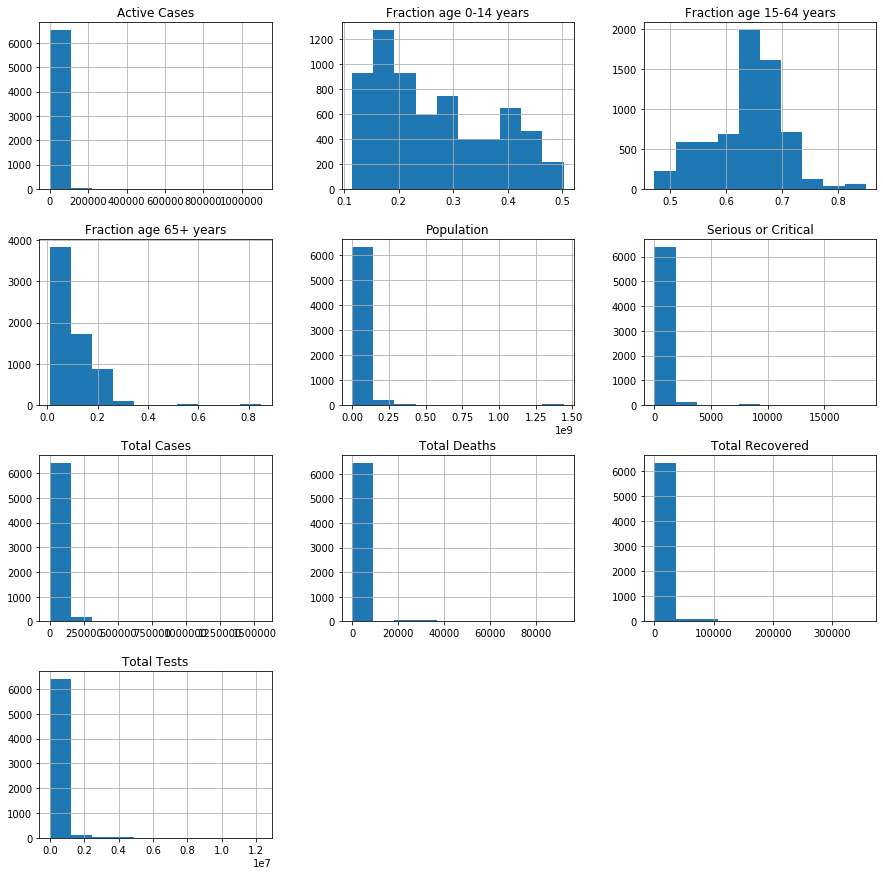

In [28]:
#checking the distribution of the data
df1.hist(figsize=(15,15))
plt.show()


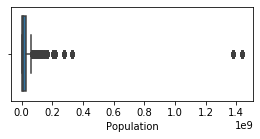

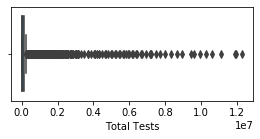

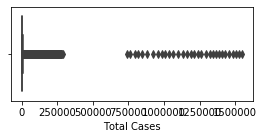

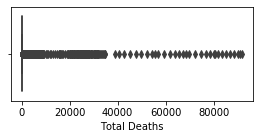

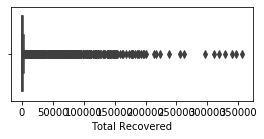

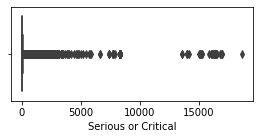

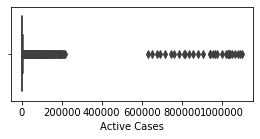

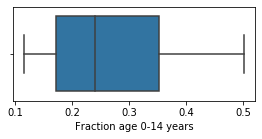

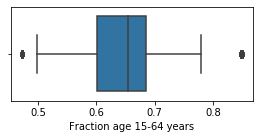

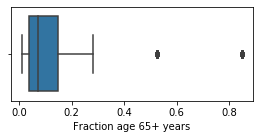

In [29]:
#checking the outliers in the data
for i in df1.columns:
    if df1[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df1[i])

Observations
1. Many columns are not in normal distrubution. They seems skewed. 
2. There are many outliers in the data which needs to be treated.

#### Statistical Analysis

In [30]:
df1.describe()

Population   Total Tests   Total Cases  Total Deaths  \
count  6.603000e+03  6.603000e+03  6.603000e+03   6603.000000   
mean   3.637913e+07  1.850482e+05  1.680405e+04   1151.147206   
std    1.411537e+08  6.993348e+05  8.829716e+04   6016.411612   
min    8.010000e+02  0.000000e+00  0.000000e+00      0.000000   
25%    8.672680e+05  1.465500e+03  7.600000e+01      1.000000   
50%    6.859926e+06  1.219000e+04  5.940000e+02     11.000000   
75%    2.546422e+07  1.066180e+05  4.757000e+03    109.000000   
max    1.439324e+09  1.230074e+07  1.550294e+06  91981.000000   

       Total Recovered  Serious or Critical  Active Cases  \
count      6603.000000          6603.000000  6.603000e+03   
mean       5602.691201           241.139331  9.875109e+03   
std       22986.345036          1322.814259  6.512407e+04   
min           0.000000             0.000000  0.000000e+00   
25%          17.000000             0.000000  2.500000e+01   
50%         183.000000             2.000000  2.600000e+02   
75%        1302.500000            27.000000  1.991000e+03   
max      356383.000000         18671.000000  1.101930e+06   

       Fraction age 0-14 years  Fraction age 15-64 years  \
count              6603.000000               6603.000000   
mean                  0.265621                  0.640381   
std                   0.104390                  0.064373   
min                   0.115000                  0.472000   
25%                   0.172000                  0.601000   
50%                   0.240000                  0.654000   
75%                   0.353000                  0.685000   
max                   0.502000                  0.850000   

       Fraction age 65+ years  
count             6603.000000  
mean                 0.099970  
std                  0.087538  
min                  0.010000  
25%                  0.037000  
50%                  0.072000  
75%                  0.150000  
max                  0.850000

#### Bivariate Analysis

In [31]:
dategroup=df1.groupby('Date').sum()
dategroup

Population  Total Tests  Total Cases  Total Deaths  \
Date                                                             
2020-04-18  7748754715   20759906.0    2330045.0      160032.0   
2020-04-19  7748754715   21476041.0    2405050.0      164994.0   
2020-04-20  7748754715   22514641.0    2479782.0      170382.0   
2020-04-21  7748754715   23535203.0    2555027.0      177444.0   
2020-04-22  7748754715   24257180.0    2634998.0      184051.0   
2020-04-23  7748754715   25357017.0    2716085.0      190513.0   
2020-04-24  7748754715   26509572.0    2827896.0      197076.0   
2020-04-25  7748754715   27802816.0    2918683.0      203149.0   
2020-04-26  7748754715   28922734.0    2992542.0      206900.0   
2020-04-27  7748754715   29938905.0    3061748.0      211432.0   
2020-04-28  7748754715   31066047.0    3135787.0      217798.0   
2020-04-29  7748754715   32738501.0    3217463.0      228015.0   
2020-04-30  7748754715   34235965.0    3303499.0      233809.0   
2020-05-01  7748754715   36119935.0    3397746.0      239433.0   
2020-05-02  7748754715   38908497.0    3480708.0      244650.0   
2020-05-03  7748754715   38909797.0    3562968.0      248131.0   
2020-05-04  7748754715   40114253.0    3642550.0      252226.0   
2020-05-05  7748754715   41243864.0    3723797.0      258012.0   
2020-05-06  7748754715   42648631.0    3816661.0      264822.0   
2020-05-07  7748754715   44157545.0    3912923.0      270411.0   
2020-05-08  7748754715   45468545.0    4008570.0      275961.0   
2020-05-09  7748754715   47334341.0    4097567.0      280209.0   
2020-05-10  7748754715   48796006.0    4177433.0      283719.0   
2020-05-11  7748754715   49771499.0    4251569.0      287122.0   
2020-05-12  7748754715   51752309.0    4336881.0      292436.0   
2020-05-13  7748754715   53545345.0    4424935.0      297750.0   
2020-05-14  7748754715   55046357.0    4521268.0      303067.0   
2020-05-15  7748754715   56909039.0    4620693.0      308139.0   
2020-05-16  7748754715   59530902.0    4716289.0      312887.0   
2020-05-17  7748754715   60567569.0    4798545.0      316505.0   
2020-05-18  7748754715   61934112.0    4887403.0      319950.0   

            Total Recovered  Serious or Critical  Active Cases  \
Date                                                             
2020-04-18         595244.0              55258.0     1574175.0   
2020-04-19         623676.0              54218.0     1615786.0   
2020-04-20         645090.0              56756.0     1663716.0   
2020-04-21         688988.0              57247.0     1688001.0   
2020-04-22         716205.0              56682.0     1734148.0   
2020-04-23         744174.0              58692.0     1780804.0   
2020-04-24         797132.0              58527.0     1833094.0   
2020-04-25         835373.0              58198.0     1879567.0   
2020-04-26         876172.0              57596.0     1908876.0   
2020-04-27         920075.0              56293.0     1929647.0   
2020-04-28         952070.0              56961.0     1965325.0   
2020-04-29         998794.0              59813.0     1990060.0   
2020-04-30        1037819.0              50952.0     2031277.0   
2020-05-01        1078845.0              51351.0     2078874.0   
2020-05-02        1152608.0              50036.0     2161635.0   
2020-05-03        1152608.0              50036.0     2161635.0   
2020-05-04        1193499.0              49635.0     2196231.0   
2020-05-05        1239466.0              49252.0     2225725.0   
2020-05-06        1298023.0              48210.0     2253222.0   
2020-05-07        1339783.0              48958.0     2302135.0   
2020-05-08        1381133.0              48699.0     2350882.0   
2020-05-09        1434967.0              47681.0     2381797.0   
2020-05-10        1489199.0              47036.0     2403921.0   
2020-05-11        1525729.0              46935.0     2438124.0   
2020-05-12        1596620.0              46336.0     2447231.0   
2020-05-13        1656473.0              45917.0   

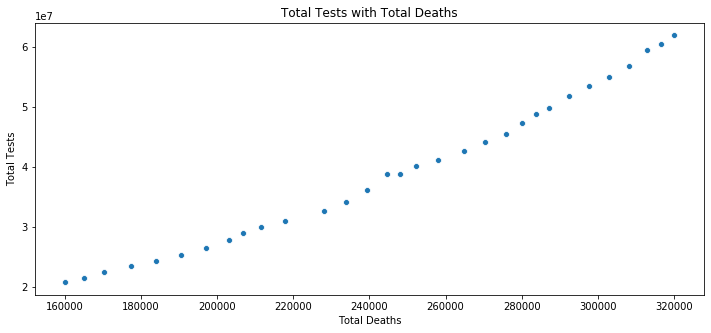

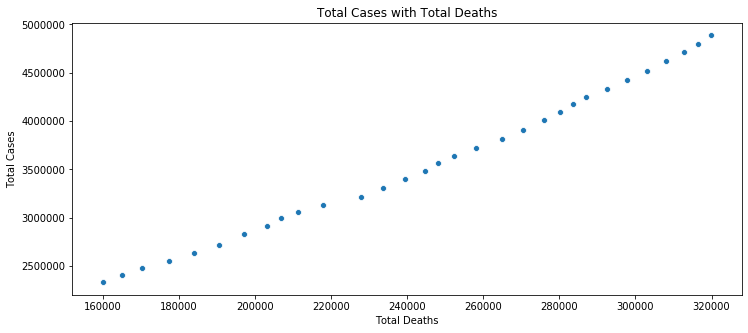

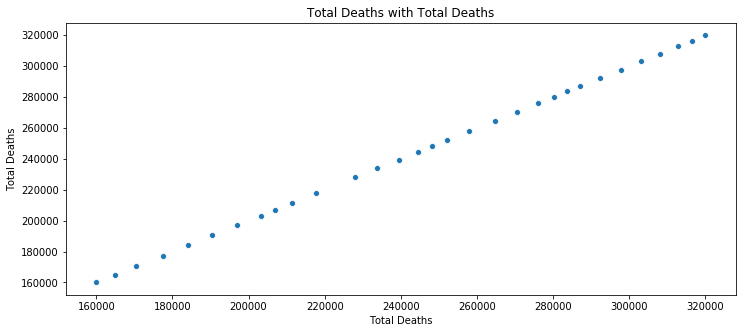

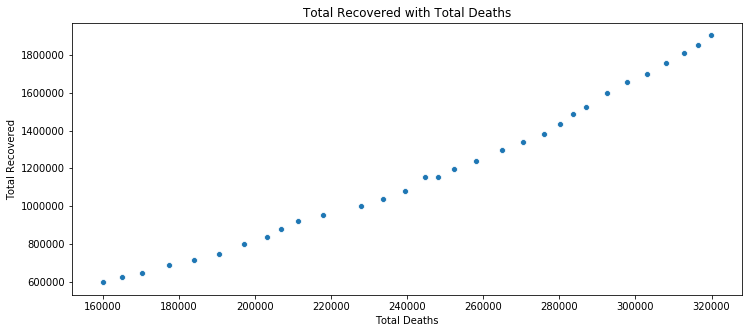

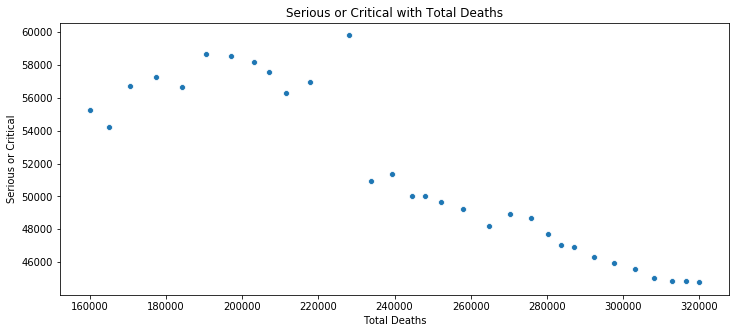

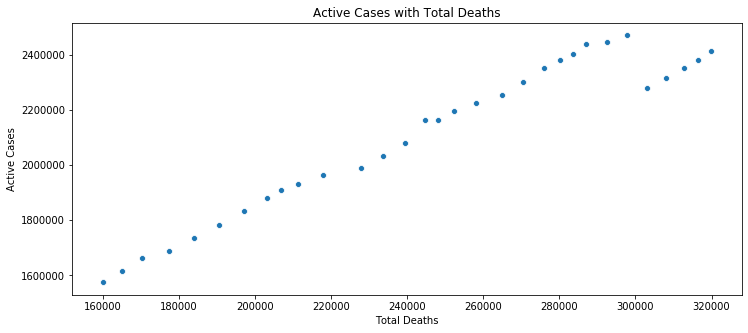

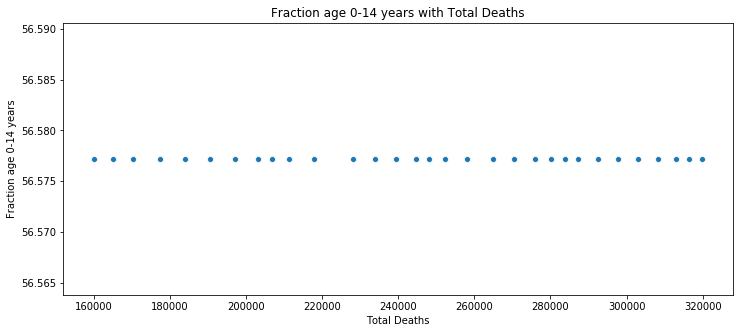

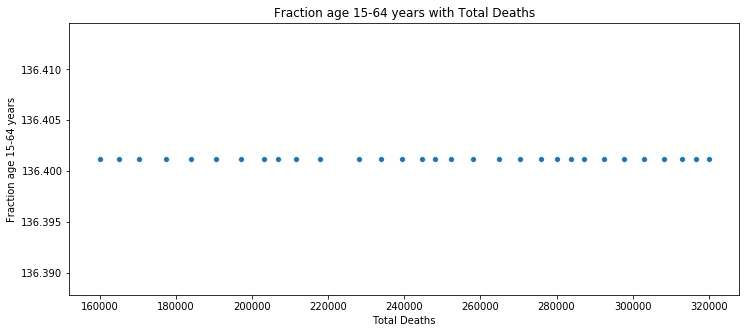

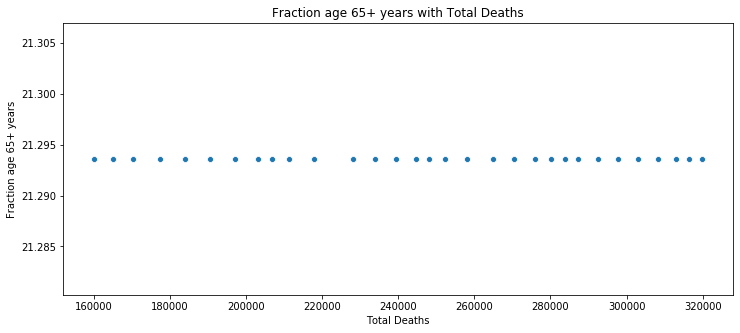

In [32]:
#scatter plots. checking the attributes relationship with the target 'Total Deaths'
cols=dategroup.iloc[:,1:]
for i in cols:
    if dategroup[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Total Deaths')
        sns.scatterplot(x=dategroup['Total Deaths'], y=dategroup[i], data=dategroup)
        plt.show()

Observations
1. Total cases, total tests, active cases, total recovered have positive correlation with the target total deaths.
2. Serious or critical with total deaths has negative correlation with the target.
3. Others show no positive or negative correlation.

In [33]:
countrygroup=df1.groupby('Country').mean()
countrygroup.sort_values('Total Cases', ascending=False)

Population   Total Tests   Total Cases  Total Deaths  \
Country                                                                        
USA                      330774664  7.483887e+06  1.167629e+06  67819.129032   
Spain                     46752703  1.795037e+06  2.434831e+05  24751.774194   
Italy                     60471924  2.159510e+06  2.069946e+05  28441.903226   
UK                        67844241  1.318500e+06  1.846437e+05  26628.322581   
France                    65256826  9.517897e+05  1.690009e+05  24572.903226   
Germany                   83752855  2.497693e+06  1.639101e+05   6717.548387   
Russia                   145927292  4.200483e+06  1.477292e+05   1367.967742   
Turkey                    84230075  1.132813e+06  1.230200e+05   3258.000000   
Brazil                   212380932  3.987626e+05  1.180653e+05   8031.322581   
Iran                      83862642  5.058230e+05  9.939439e+04   6155.129032   
China                   1439323776  8.286045e+05  8.286045e+04   4632.774194   
Canada                    37702769  9.002153e+05  5.752655e+04   3705.935484   
India                   1378381772  1.152194e+06  4.890961e+04   1589.258065   
Belgium                   11583739  3.913382e+05  4.879174e+04   7713.258065   
Peru                      32915899  3.767046e+05  4.847397e+04   1362.967742   
Netherlands               17130492  2.282022e+05  3.966142e+04   4891.935484   
Switzerland                8647139  2.787453e+05  2.955497e+04   1718.612903   
Saudi Arabia              34747330  3.518677e+05  2.903565e+04    194.064516   
Portugal                  10200063  4.330210e+05  2.530006e+04   1008.548387   
Ecuador                   17610231  6.918294e+04  2.491900e+04   1419.870968   
Mexico                   128770253  9.692945e+04  2.409958e+04   2379.161290   
Chile                     19096687  2.208808e+05  2.236490e+04    262.645161   
Sweden                    10091856  1.291548e+05  2.235910e+04   2711.258065   
Pakistan                 220356788  2.177281e+05  2.195603e+04    480.806452   
Ireland                    4931150  1.786826e+05  2.072571e+04   1217.096774   
Singapore                  5844888  1.540931e+05  1.809116e+04     16.741935   
Qatar                      2875047  1.061465e+05  1.692052e+04     11.677419   
Belarus                    9449678  2.086728e+05  1.691052e+04    102.451613   
Israel                     8638917  3.761857e+05  1.575097e+04    226.903226   
Austria                    9000366  2.720629e+05  1.553335e+04    575.451613   
UAE                        9875965  1.161514e+06  1.446103e+04    131.096774   
Japan                    126520115  1.804585e+05  1.431026e+04    496.322581   
Poland                    37851327  3.886740e+05  1.383032e+04    667.096774   
Romania                   19251921  1.970597e+05  1.305784e+04    787.774194   
Ukraine                   43762985  1.334292e+05  1.182242e+04    307.193548   
Indonesia                273176544  1.134341e+05  1.154377e+04    850.193548   
S. Korea                  51264120  6.382176e+05  1.081642e+04    249.419355   
Bangladesh               164493041  8.871232e+04  1.066548e+04    191.516129   
Denmark                    5789832  2.408458e+05  9.403645e+03    468.677419   
Philippines              109403890  1.281049e+05  9.272839e+03    614.387097   
Serbia                     8741321  1.042175e+05  8.979194e+03    184.129032   
Colombia                  50817787  1.188440e+05  8.520516e+03    357.419355   
Dominican Republic        10834889  3.293477e+04  8.193194e+03    333.161290   
Norway                     5416217  1.794885e+05  7.795613e+03    209.483871   
Czechia                   10706690  2.598148e+05  7.743452e+03    247.806452   
South Africa              59218133  2.609742e+05  7.720387e+03    143.806452   
Egypt                    102094004  9.064516e+04  7.036710e+03    427.096774   
Panama                     4306425  3.359139e+04  6.918484e+03    196.774194   
Australia               

Observation
1. USA is the top 1 nation in terms of total cases and active cases.
2. Spain in second in total cases, however in terms of active cases UK, Russia and Italy are ahead of Spain.
3. Brazil has over 60000 active cases.
4. The least affected countries are Lesotho, Saint Pierre Miquelon, Comoros and Carribbean Netherlands.

#### Correlation

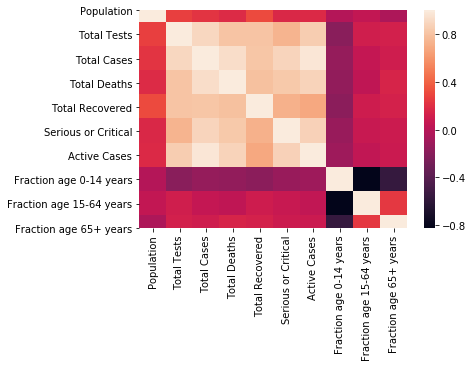

In [34]:
sns.heatmap(df1.corr())

In [35]:
df1.corr()

Population  Total Tests  Total Cases  Total Deaths  \
Population                  1.000000     0.271435     0.226144      0.184892   
Total Tests                 0.271435     1.000000     0.901015      0.814126   
Total Cases                 0.226144     0.901015     1.000000      0.935250   
Total Deaths                0.184892     0.814126     0.935250      1.000000   
Total Recovered             0.310775     0.811325     0.818957      0.795902   
Serious or Critical         0.172346     0.743656     0.892289      0.833374   
Active Cases                0.179594     0.852947     0.975015      0.881876   
Fraction age 0-14 years    -0.010901    -0.192955    -0.139119     -0.157125   
Fraction age 15-64 years    0.049474     0.115030     0.059877      0.034830   
Fraction age 65+ years     -0.040602     0.127826     0.109169      0.148834   

                          Total Recovered  Serious or Critical  Active Cases  \
Population                       0.310775             0.172346      0.179594   
Total Tests                      0.811325             0.743656      0.852947   
Total Cases                      0.818957             0.892289      0.975015   
Total Deaths                     0.795902             0.833374      0.881876   
Total Recovered                  1.000000             0.723509      0.685120   
Serious or Critical              0.723509             1.000000      0.875839   
Active Cases                     0.685120             0.875839      1.000000   
Fraction age 0-14 years         -0.186727            -0.130971     -0.105807   
Fraction age 15-64 years         0.097075             0.068401      0.043811   
Fraction age 65+ years           0.135220             0.093674      0.083789   

                          Fraction age 0-14 years  Fraction age 15-64 years  \
Population                              -0.010901                  0.049474   
Total Tests                             -0.192955                  0.115030   
Total Cases                             -0.139119                  0.059877   
Total Deaths                            -0.157125                  0.034830   
Total Recovered                         -0.186727                  0.097075   
Serious or Critical                     -0.130971                  0.068401   
Active Cases                            -0.105807                  0.043811   
Fraction age 0-14 years                  1.000000                 -0.821905   
Fraction age 15-64 years                -0.821905                  1.000000   
Fraction age 65+ years                  -0.558828                  0.239659   

                          Fraction age 65+ years  
Population                             -0.040602  
Total Tests                             0.127826  
Total Cases                             0.109169  
Total Deaths                            0.148834  
Total Recovered                         0.135220  
Serious or Critical                     0.093674  
Active Cases                            0.083789  
Fraction age 0-14 years                -0.558828  
Fraction age 15-64 years                0.239659  
Fraction age 65+ years                  1.000000

Observations
1. Total tests, total cases, total deaths, total recovered, serious critical and active cases are positively correlated with each other.

In [36]:
#Using Labelencoder to encode the categorical variables
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df1['Date']=lb.fit_transform(df1['Date'])
df1['Country']=lb.fit_transform(df1['Country'])

#### removing outliers

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
print("The datashape before removing outliers is ", df1.shape)
df2=df1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df2.shape)

The datashape before removing outliers is  (6603, 12)
The datashape after removing outliers is  (6148, 12)


#### Shuffling the data
Let us shuffle the data as in this dataset, one section will have high mortality (later dates) and one section will have very less (earlier dates). This will avoid in model to overfit or underfit and will give better scores


In [38]:
df2 = df2.sample(frac=1).reset_index(drop=True)

#### splitting the data into input and output variables

In [39]:
y=pd.DataFrame(df2['Total Deaths'])
x=df2.drop('Total Deaths', axis=1)
x.head()

Date  Country  Population  Total Tests  Total Cases  Total Recovered  \
0     6      128     4035024      11763.0       3110.0            755.0   
1    27       34    16690788      14615.0        122.0            121.0   
2    27      121    20174887       2498.0        806.0            455.0   
3    11       31    11844472        284.0         11.0              4.0   
4    26       24     3283087      45810.0       2218.0           1272.0   

   Serious or Critical  Active Cases  Fraction age 0-14 years  \
0                212.0        2271.0                    0.157   
1                  1.0           1.0                    0.313   
2                  0.0         305.0                    0.477   
3                  0.0           6.0                    0.450   
4                  4.0         824.0                    0.141   

   Fraction age 15-64 years  Fraction age 65+ years  
0                     0.734                   0.109  
1                     0.643                   0.044  
2                     0.498                   0.025  
3                     0.524                   0.026  
4                     0.693                   0.166

In [40]:
y.head()

Total Deaths
0          84.0
1           0.0
2          46.0
3           1.0
4         122.0

#### checking the skewness

In [41]:
x.skew()

Date                        0.008323
Country                     0.003109
Population                  3.840308
Total Tests                 4.529079
Total Cases                 5.308929
Total Recovered             7.212942
Serious or Critical         9.439433
Active Cases                6.342796
Fraction age 0-14 years     0.452321
Fraction age 15-64 years   -0.499379
Fraction age 65+ years      0.767761
dtype: float64

In [42]:
#using log1p method to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [43]:
x.skew()
#This has removed the skewness to a great extent

Date                        0.008323
Country                     0.003109
Population                 -0.811507
Total Tests                -0.500995
Total Cases                -0.065427
Total Recovered             0.000217
Serious or Critical         0.975762
Active Cases               -0.080538
Fraction age 0-14 years     0.452321
Fraction age 15-64 years   -0.499379
Fraction age 65+ years      0.687668
dtype: float64

#### Pre Processing the data

In [44]:
#We need to scale the data for normalising the input data and for the same we can use Standardscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

0         1         2         3         4         5         6  \
0  0.200000  0.603774  0.669106  0.640812  0.679536  0.591314  0.656658   
1  0.900000  0.160377  0.780566  0.655653  0.406586  0.428586  0.084898   
2  0.900000  0.570755  0.795449  0.534897  0.565526  0.546212  0.000000   
3  0.366667  0.146226  0.753640  0.386457  0.209952  0.143584  0.000000   
4  0.866667  0.113208  0.652916  0.733759  0.650987  0.637802  0.197126   

          7         8         9        10  
0  0.661291  0.108527  0.853420  0.390838  
1  0.059310  0.511628  0.557003  0.138387  
2  0.489746  0.935401  0.084691  0.061619  
3  0.166504  0.865633  0.169381  0.065694  
4  0.574610  0.067183  0.719870  0.600327

In [46]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [47]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.4188828232514902 is achieved at random state 71


In [48]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=71,test_size=0.20)

In [110]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 1}

In [111]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [112]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'linear'}

In [114]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=1),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='linear')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.3843501364274169
The cross val score is 0.36144204047429174
The mean squared error is 680732.7733055043
The root mean squared error is 825.0653145694008




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')
The r2 score is 0.9985987785460092
The cross val score is 0.9986167837692059
The mean squared error is 1549.350406504065
The root mean squared error is 39.361788659867386




DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=None, splitter='best'

In [115]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

Model   R2score  Cross_val_score  Mean Squared Error  \
0       LinearRegression  0.384350         0.361442        6.807328e+05   
1    KNeighborsRegressor  0.998599         0.998617        1.549350e+03   
2  DecisionTreeRegressor  0.983528         0.995219        1.821325e+04   
3                    SVR  0.038857         0.039770        1.062750e+06   

   Root Mean Squared Error  
0               825.065315  
1                39.361789  
2               134.956482  
3              1030.897464

#### Observation
This dataset is different from other datasets we have worked. The dataset was required to be shuffled before model is applied or else the cross validation score would have heavy variance (since cross validation considers each part of data separately and in this dataset, datewise initial dates would have low death and later dates would have high mortality)

In [116]:
# we can finalise the Decision Tree Regressor which is giving good r2 score and better cross val score. (though Kneighbors is giving slightly better scores, if Decision Tree is giving similar results, we prefer Decision Tree as it is better model)

DecisionTreeRegressor(criterion='friedman_mse')
dt.fit(train_x,train_y)
pred=dt.predict(test_x)
r2score=r2_score(pred,test_y)
print("The r2 score is ", r2score)
crossscore=cross_val_score(dt,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", crossscore)

The r2 score is  0.9942788470742481
The cross val score is 0.9947641509149834


In [117]:
# saving the model
from sklearn.externals import joblib
joblib.dump(dt,"Project18_COVID19.pkl")

['Project18_COVID19.pkl']